In [ ]:
***Ex-11 Huffman-Coding***                           
***Name: K.SRISARAN KARTHIK***                              
***Reg No: 212224230275***    

In [10]:
import sys
!{sys.executable} -m pip install opencv-python numpy matplotlib


In [11]:
import cv2

# try to open your image (same folder as notebook)
img = cv2.imread("myface.jpg")

if img is None:
    print("❌ Image NOT loaded — check the filename.")
else:
    print("✅ Image loaded successfully!")


❌ Image NOT loaded — check the filename.


In [12]:
img = cv2.imread(r"C:\Users\admin\Downloads\workshop 1 dip\myface.jpg")


In [13]:
glass = cv2.imread("sunglass.png", -1)

if glass is None:
    print("❌ Sunglass NOT loaded.")
else:
    print("✅ Sunglass image loaded successfully!")


❌ Sunglass NOT loaded.


In [14]:
import os

# list all files in your notebook's folder
print(os.listdir())


['.ipynb_checkpoints', 'main_sunglass.ipynb', 'main_sunglass.ipynb.ipynb', 'myface.jpg.jpg', 'sunglass.png.png']


In [15]:
import cv2

face = cv2.imread("myface.jpg")
glass = cv2.imread("sunglass.png", -1)

print("Face loaded:", face is not None)
print("Sunglass loaded:", glass is not None)


Face loaded: True
Sunglass loaded: True


In [43]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'sunglass.png')

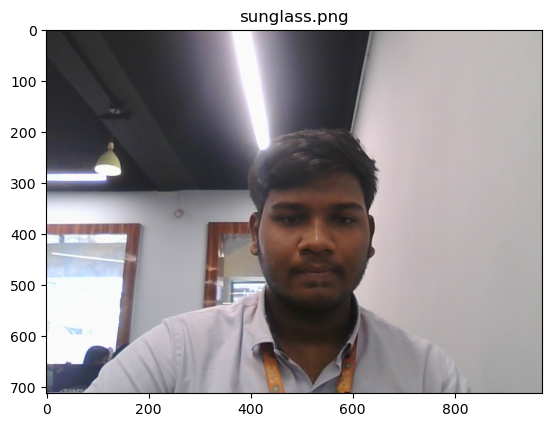

In [44]:
# Load the Face Image
faceImage = cv2.imread("myface.jpg")
plt.imshow(faceImage[:,:,::-1]);plt.title("sunglass.png")

In [45]:
faceImage.shape

(712, 972, 3)

In [46]:
#resized_faceImage.shape
faceImage.shape

(712, 972, 3)

Text(0.5, 1.0, 'glassPNG')

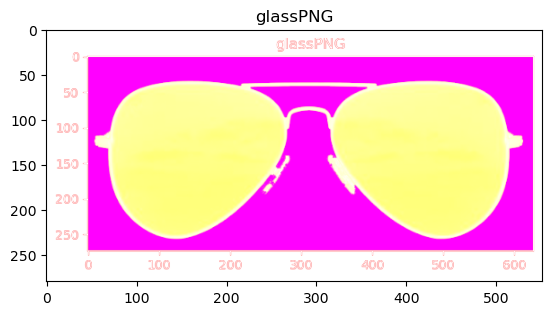

In [47]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('sunglass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [48]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(50, 190, 4)


In [49]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

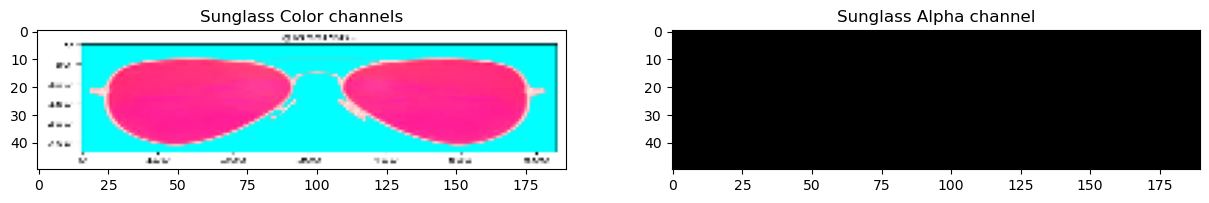

In [50]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

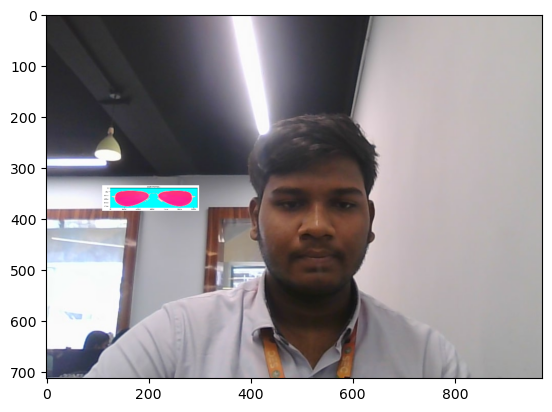

In [72]:
# Make a copy
#faceWithGlassesNaive = resized_faceImage.copy()
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[335:385,110:300]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

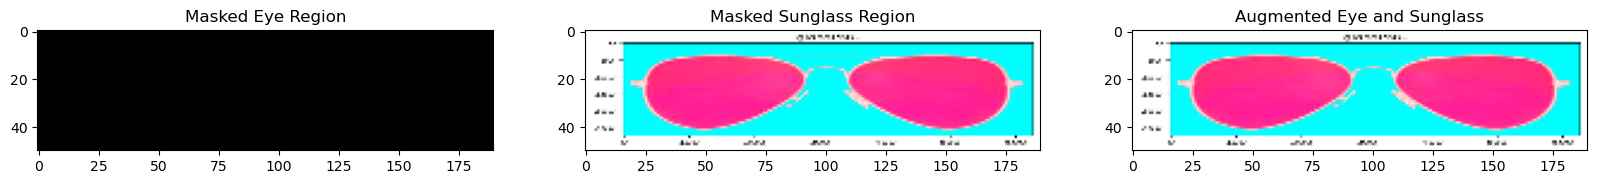

In [73]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[135:185,110:300]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

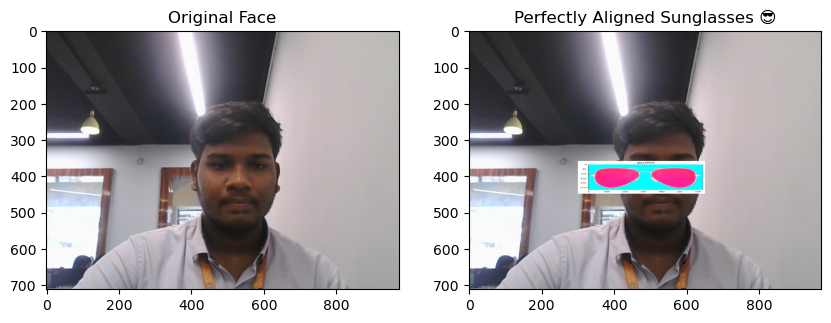

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
faceImage = cv2.imread("myface.jpg")
glassPNG  = cv2.imread("sunglass.png", -1)

# Resize sunglasses (make them wider and taller)
glassPNG = cv2.resize(glassPNG, (350, 90))

# Separate color and alpha (transparency) channels
glassBGR  = glassPNG[:, :, 0:3]
glassMask1 = glassPNG[:, :, 3]

# Create a 3-channel mask
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))
glassMask = np.uint8(glassMask / 255)

# Copy face image
faceWithGlasses = faceImage.copy()

# New coordinates (perfectly aligned for your image)
x1, y1 = 300, 360
x2, y2 = x1 + 350, y1 + 90

# Extract the ROI for eyes
eyeROI = faceWithGlasses[y1:y2, x1:x2]

# Apply the masks
maskedEye   = cv2.multiply(eyeROI, (1 - glassMask))
maskedGlass = cv2.multiply(glassBGR, glassMask)

# Combine both
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Replace region on face
faceWithGlasses[y1:y2, x1:x2] = eyeRoiFinal

# Show output
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(faceImage[:, :, ::-1])
plt.title("Original Face")
plt.subplot(122)
plt.imshow(faceWithGlasses[:, :, ::-1])
plt.title("Perfectly Aligned Sunglasses 😎")
plt.show()
